In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pickle
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
df = pd.read_csv('./dataset/16P.csv', encoding='cp1252')
df

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

In [4]:
df.describe()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.
count,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000
mean,29999.000000,-0.000867,-0.000467,0.000267,-0.232887,-0.175653,0.005317,-0.476558,-0.000550,0.126819,...,0.001233,0.000133,0.115869,-0.002167,0.240687,-0.000533,0.000667,0.125152,0.001983,0.118202
std,17320.363738,0.365701,0.364652,1.527343,1.502173,1.502999,1.521413,1.445931,0.367361,1.537329,...,0.365517,0.367611,1.526440,0.366515,1.498320,0.364606,0.368426,1.515761,1.524584,1.542457
min,0.000000,-2.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,...,-1.000000,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-2.000000,-3.000000,-3.000000,-3.000000
25%,14999.500000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
50%,29999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44998.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,59998.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000


## Data Cleaning

In [5]:
#lowercase all columns
df.columns = df.columns.str.lower()

#deleting response id column
df = df.drop(columns= 'response id')

#deleting . in the end of column 
df.columns = [col.rstrip('.') if isinstance(col, str) and col.endswith('.') else col for col in df.columns]

## EDA 

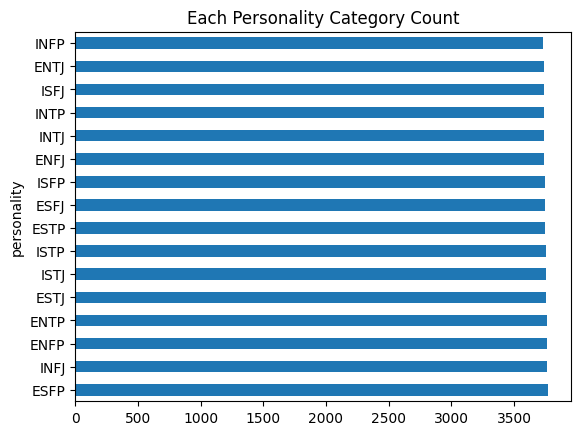

In [79]:
#count each personality category 
df['personality'].value_counts().plot(kind='barh', title='Each Personality Category Count')
plt.show()


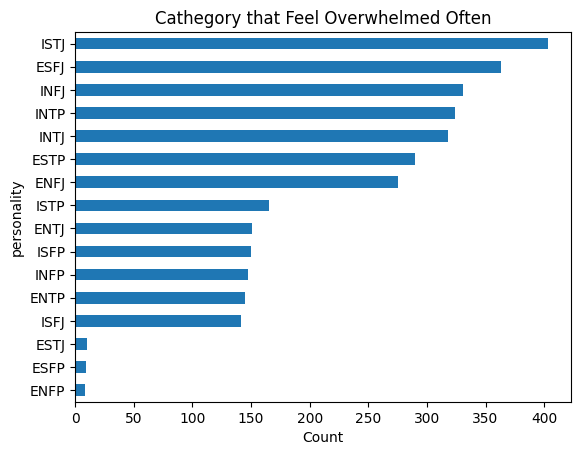

In [80]:
overwhelmed = df[df['you often feel overwhelmed'] == max(df['you often feel overwhelmed'].unique())]
overwhelmed['personality'].value_counts().plot(kind='barh', title='Cathegory that Feel Overwhelmed Often')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

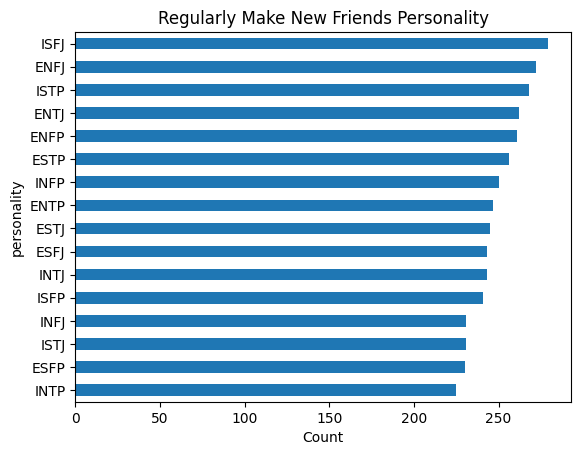

In [81]:
new_friends = df[df['you regularly make new friends'] == max(df['you regularly make new friends'].unique())]
new_friends['personality'].value_counts().plot(kind='barh', title='Regularly Make New Friends Personality')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

##

In [6]:
#convert kategori to numeric
encoder_personality = LabelEncoder()
df['personality'] = encoder_personality.fit_transform(df['personality'])

In [7]:
#convert all columns to numeric 
encoder_columns = LabelEncoder()
df.columns = encoder_columns.fit_transform(df.columns)

df.corr()

,45,46,6,37,54,1,39,15,32,2,...,19,26,29,35,20,14,56,47,25,5
45,1.000000,0.001872,-0.003700,0.004305,-0.002460,0.000428,-0.002956,0.000989,-0.000872,0.006430,...,0.001737,-0.003612,-0.002004,-0.003878,-0.001628,-0.001109,0.002872,0.002963,0.001511,-0.004391
46,0.001872,1.000000,0.001856,-0.003393,-0.001457,0.001447,-0.001180,0.004975,-0.003611,0.001606,...,-0.001119,-0.000921,0.002112,-0.002113,-0.001255,-0.009923,-0.000678,-0.000958,-0.000702,-0.000952
6,-0.003700,0.001856,1.000000,0.071982,0.014353,0.003865,0.042517,0.000060,0.106469,-0.001870,...,-0.000861,0.048100,0.002681,0.062870,-0.004040,-0.000682,0.051303,0.060876,0.080745,0.181632
37,0.004305,-0.003393,0.071982,1.000000,-0.040502,-0.210979,-0.037477,-0.000051,-0.004150,-0.002443,...,-0.003898,0.065071,0.003745,-0.035781,0.000899,-0.008573,0.171982,-0.009186,0.014211,-0.234797
54,-0.002460,-0.001457,0.014353,-0.040502,1.000000,0.094573,-0.002772,0.002089,-0.059982,0.007197,...,0.002908,0.061607,0.007085,0.087879,-0.006619,-0.000391,0.035731,-0.094340,0.012393,-0.128118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,-0.001109,-0.009923,-0.000682,-0.008573,-0.000391,0.005970,-0.009071,-0.001106,0.003765,-0.001215,...,0.001476,-0.003220,-0.000360,0.004359,-0.002231,1.000000,-0.005163,0.000650,0.003381,0.002032
56,0.002872,-0.000678,0.051303,0.171982,0.035731,-0.040249,-0.098562,-0.002331,0.055080,-0.002974,...,-0.005025,0.102630,-0.005842,-0.002153,-0.000030,-0.005163,1.000000,-0.067984,0.045948,-0.203336
47,0.002963,-0.000958,0.060876,-0.009186,-0.094340,0.006118,0.059372,0.001044,-0.059337,0.008583,...,-0.000744,-0.049631,-0.003124,-0.053115,-0.000298,0.000650,-0.067984,1.000000,0.069529,-0.101357
25,0.001511,-0.000702,0.080745,0.014211,0.012393,-0.113607,0.049881,0.002321,0.048672,-0.001021,...,0.002412,0.036048,0.001426,0.038728,0.002276,0.003381,0.045948,0.069529,1.000000,0.179613


In [8]:
col_dict = {i : col for i,col in enumerate(encoder_columns.classes_)}
col_dict

{0: 'after a long and exhausting week, a lively social event is just what you need',
 1: 'at social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
 2: 'even a small mistake can cause you to doubt your overall abilities and knowledge',
 3: 'if your plans are interrupted, your top priority is to get back on track as soon as possible',
 4: 'in your social circle, you are often the one who contacts your friends and initiates activities',
 5: 'personality',
 6: 'seeing other people cry can easily make you feel like you want to cry too',
 7: 'when someone thinks highly of you, you wonder how long it will take them to feel disappointed in you',
 8: 'you are definitely not an artistic type of person',
 9: 'you are interested in so many things that you find it difficult to choose what to try next',
 10: 'you are more inclined to follow your head than your heart',
 11: 'you are not too interested in discussing various interpretations and

## Data Preprocessing 

In [9]:
df.columns = encoder_columns.inverse_transform(df.columns)

In [10]:
df.columns

Index(['you regularly make new friends',
       'you spend a lot of your free time exploring various random topics that pique your interest',
       'seeing other people cry can easily make you feel like you want to cry too',
       'you often make a backup plan for a backup plan',
       'you usually stay calm, even under a lot of pressure',
       'at social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'you prefer to completely finish one project before starting another',
       'you are very sentimental',
       'you like to use organizing tools like schedules and lists',
       'even a small mistake can cause you to doubt your overall abilities and knowledge',
       'you feel comfortable just walking up to someone you find interesting and striking up a conversation',
       'you are not too interested in discussing various interpretations and analyses of creative works',
       'you are more inclined to follow you

In [11]:
# selecting features
X = df.iloc[:, :-1]
y = df.iloc[:,-1]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
len(X_train), len(X_test)

(47999, 12000)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#save standarization scaler
with open('scaler.pkl', 'wb') as file : 
    pickle.dump(scaler, file)

In [16]:
#save personality label encoder 
with open('encoder_personality.pkl', 'wb') as file : 
    pickle.dump(encoder_personality, file)

## ANN 

- sequential network 
- dense/ hidden layers/ neuron
- activation function(sigmoid, relu, softmax)
- optimizer-backpropagation-updating weights
- loss function 
- metrics 
- training - logs - folder - tensorboard - visualization

In [100]:
model = Sequential(
    [Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='softmax')]
)

c:\Users\Asus\anaconda_new\envs\classification_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         7,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,672 (72.94 KB)

 Trainable params: 18,672 (72.94 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#set up hyperparameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [103]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [104]:
log_dir = 'log/fit' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [105]:
#set up early stopping 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [106]:
history = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs=100,batch_size=32, callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/100


c:\Users\Asus\anaconda_new\envs\classification_env\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7443 - loss: 0.9001 - val_accuracy: 0.9697 - val_loss: 0.1782
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9742 - loss: 0.1630 - val_accuracy: 0.9778 - val_loss: 0.1538
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9822 - loss: 0.1271 - val_accuracy: 0.9722 - val_loss: 0.1670
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9846 - loss: 0.1154 - val_accuracy: 0.9783 - val_loss: 0.1484
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9855 - loss: 0.1001 - val_accuracy: 0.9799 - val_loss: 0.1466
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9877 - loss: 0.0876 - val_accuracy: 0.9777 - val_loss: 0.1503
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9874 - loss: 0.0844 - val_accuracy: 0.9782 - val_loss: 0.1532
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9883 - loss: 0.0731 - val

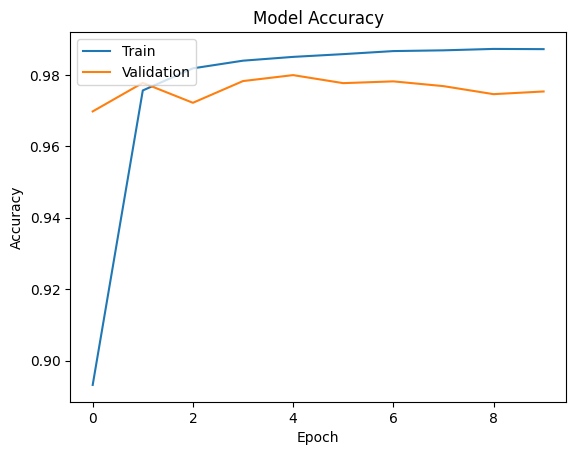

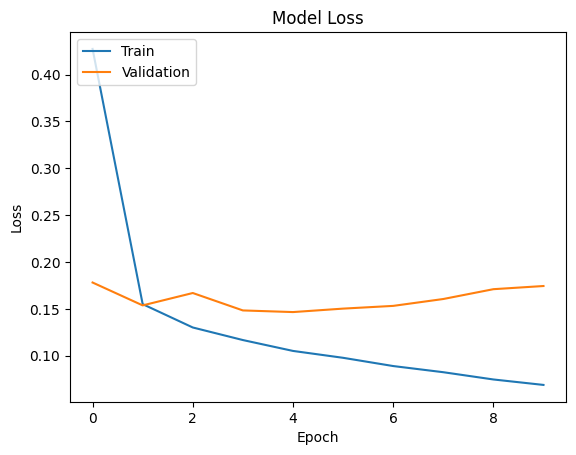

In [107]:
#plotting train and test of accuracy and validation loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [108]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [110]:
report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       739
           1       0.98      0.99      0.99       773
           2       0.98      0.98      0.98       738
           3       0.99      0.98      0.98       748
           4       0.98      0.98      0.98       770
           5       0.98      0.97      0.98       790
           6       0.98      0.98      0.98       739
           7       0.97      0.99      0.98       773
           8       0.97      0.98      0.98       775
           9       0.98      0.96      0.97       749
          10       0.97      0.99      0.98       699
          11       0.96      0.99      0.98       744
          12       0.99      0.97      0.98       753
          13       0.99      0.97      0.98       745
          14       0.98      0.99      0.98       740
          15       0.98      0.97      0.98       725

    accuracy                           0.98     12000
   macro avg       0.98   

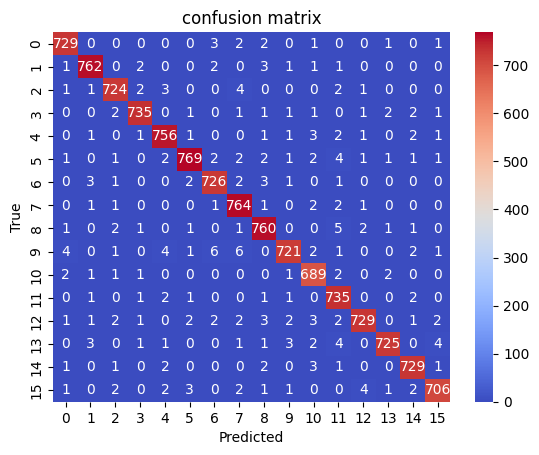

In [111]:
cf = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cf, annot=True, fmt='d', cmap='coolwarm',xticklabels=1, yticklabels=1)
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [112]:
#save model 
model.save('model.h5')

## ANN without Callbacks 

In [83]:
model2 = Sequential(
    [
        Dense(64, activation='relu', input_shape=(X_train.shape[1], )),
        Dense(32, activation='relu'), 
        Dense(16, activation='softmax') #for multiclass classification output
    ]
)

c:\Users\Asus\anaconda_new\envs\classification_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,512 (25.44 KB)

 Trainable params: 6,512 (25.44 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [88]:
model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [89]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50


c:\Users\Asus\anaconda_new\envs\classification_env\Lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6550 - loss: 1.1976 - val_accuracy: 0.9550 - val_loss: 0.2172
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9645 - loss: 0.1963 - val_accuracy: 0.9696 - val_loss: 0.1738
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9758 - loss: 0.1585 - val_accuracy: 0.9736 - val_loss: 0.1644
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9799 - loss: 0.1386 - val_accuracy: 0.9757 - val_loss: 0.1590
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.1259 - val_accuracy: 0.9781 - val_loss: 0.1545
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.1250 - val_accuracy: 0.9774 - val_loss: 0.1540
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9848 - loss: 0.1169 - val_accuracy: 0.9778 - val_loss: 0.1511
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.1110 - val_accurac

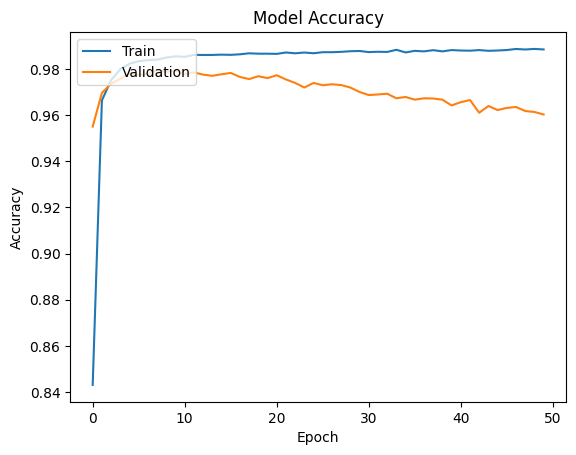

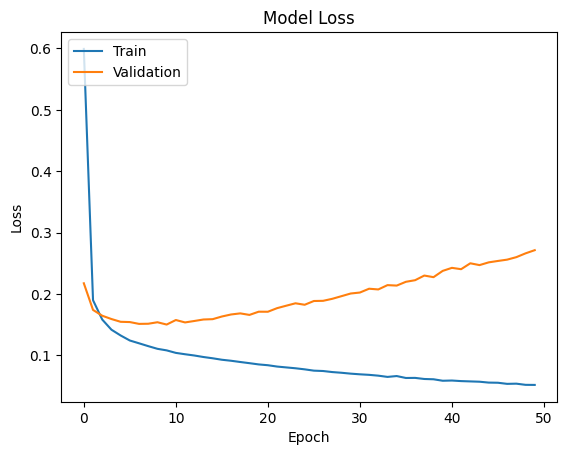

In [90]:
#plotting train and test of accuracy and validation loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [91]:
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step


In [92]:
#classification report
report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       739
           1       0.97      0.96      0.96       773
           2       0.96      0.95      0.96       738
           3       0.97      0.97      0.97       748
           4       0.97      0.96      0.97       770
           5       0.96      0.95      0.95       790
           6       0.94      0.97      0.96       739
           7       0.93      0.97      0.95       773
           8       0.96      0.96      0.96       775
           9       0.96      0.96      0.96       749
          10       0.95      0.95      0.95       699
          11       0.95      0.97      0.96       744
          12       0.97      0.95      0.96       753
          13       0.97      0.96      0.96       745
          14       0.97      0.96      0.97       740
          15       0.96      0.96      0.96       725

    accuracy                           0.96     12000
   macro avg       0.96   

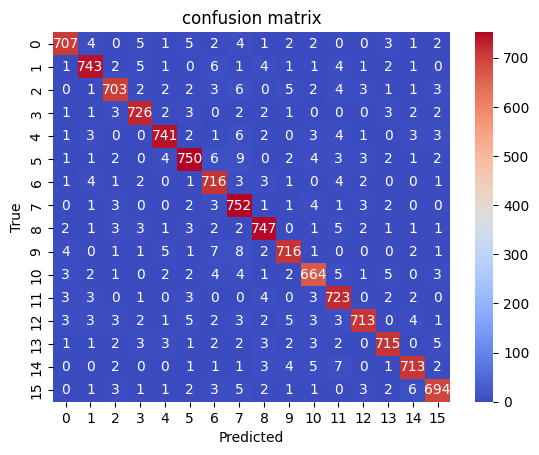

In [93]:
#confusion matrix
cf = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cf, annot=True, fmt='d', cmap='coolwarm',xticklabels=1, yticklabels=1)
plt.title('confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()